In [2]:
!pip install -q wordcloud s3fs


In [3]:
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from cytoolz import *
from wordcloud import WordCloud
from collections import Counter

In [4]:
df = pd.read_csv('s3://ling583/winemag-data_first150k.csv', index_col=0)
len(df)

150930

In [5]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


<Axes: ylabel='Frequency'>

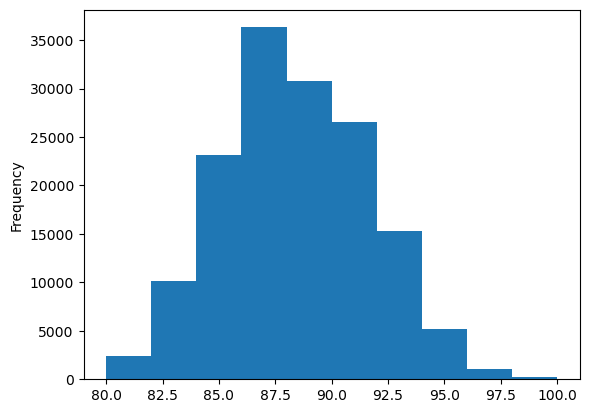

In [6]:
df["points"].plot(kind="hist")

<Axes: ylabel='Frequency'>

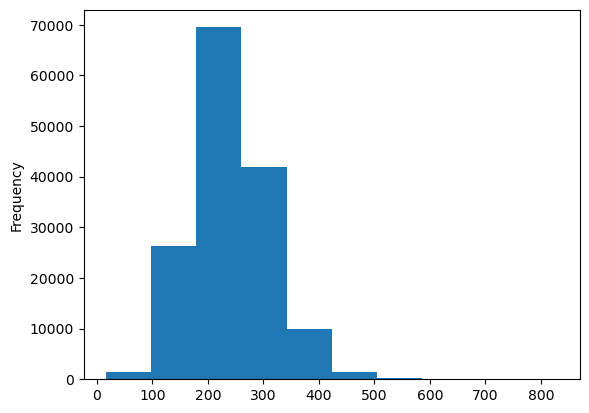

In [7]:
df["len"] = df["description"].str.len()
df["len"].plot(kind="hist")

In [8]:
df.query("len < 25")

,country,description,designation,points,price,province,region_1,region_2,variety,winery,len
18827,US,Judi Sorensen Flom,Signature Collection,85,29.0,Oregon,Oregon,Oregon Other,Pinot Noir,King Estate,18
36008,US,"Thin, green and tannic.",NaN,82,28.0,Oregon,Rogue Valley,Southern Oregon,Cabernet Franc,Del Rio,23
81347,US,Judi Sorensen Flom,Signature Collection,85,29.0,Oregon,Oregon,Oregon Other,Pinot Noir,King Estate,18
103568,US,"Thin, green and tannic.",NaN,82,28.0,Oregon,Rogue Valley,Southern Oregon,Cabernet Franc,Del Rio,23
116396,US,Sweet and fruity.,NaN,82,11.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Hoodsport,17
116483,US,"Very tannic, rough.",NaN,80,11.0,Washington,Columbia Valley (WA),Columbia Valley,Cabernet Sauvignon,Hoodsport,19
116488,US,"Very tannic, rough.",NaN,80,11.0,Washington,Columbia Valley (WA),Columbia Valley,Cabernet Merlot,Hoodsport,19
128156,US,Sweet and fruity.,NaN,82,11.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Hoodsport,17
128453,US,"Very tannic, rough.",NaN,80,11.0,Washington,Columbia Valley (WA),Columbia Valley,Cabernet Sauvignon,Hoodsport,19
128458,US,"Very tannic, rough.",NaN,80,11.0,Washington,Columbia Valley (WA),Columbia Valley,Cabernet Merlot,Hoodsport,19


In [11]:
df[df['len']<25]

,country,description,designation,points,price,province,region_1,region_2,variety,winery,len
18827,US,Judi Sorensen Flom,Signature Collection,85,29.0,Oregon,Oregon,Oregon Other,Pinot Noir,King Estate,18
36008,US,"Thin, green and tannic.",NaN,82,28.0,Oregon,Rogue Valley,Southern Oregon,Cabernet Franc,Del Rio,23
81347,US,Judi Sorensen Flom,Signature Collection,85,29.0,Oregon,Oregon,Oregon Other,Pinot Noir,King Estate,18
103568,US,"Thin, green and tannic.",NaN,82,28.0,Oregon,Rogue Valley,Southern Oregon,Cabernet Franc,Del Rio,23
116396,US,Sweet and fruity.,NaN,82,11.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Hoodsport,17
116483,US,"Very tannic, rough.",NaN,80,11.0,Washington,Columbia Valley (WA),Columbia Valley,Cabernet Sauvignon,Hoodsport,19
116488,US,"Very tannic, rough.",NaN,80,11.0,Washington,Columbia Valley (WA),Columbia Valley,Cabernet Merlot,Hoodsport,19
128156,US,Sweet and fruity.,NaN,82,11.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Hoodsport,17
128453,US,"Very tannic, rough.",NaN,80,11.0,Washington,Columbia Valley (WA),Columbia Valley,Cabernet Sauvignon,Hoodsport,19
128458,US,"Very tannic, rough.",NaN,80,11.0,Washington,Columbia Valley (WA),Columbia Valley,Cabernet Merlot,Hoodsport,19


In [12]:
df = df.drop_duplicates()
len(df)

97851

In [13]:
pd.set_option("display.max_colwidth", 500)
df[df['len']<700]

,country,description,designation,points,price,province,region_1,region_2,variety,winery,len
0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.",Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,355
1,Spain,"Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,318
2,US,"Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.",Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,280
3,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032.",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,386
4,France,"This is the top wine from La Bégude, named after the highest point in the vineyard at 1200 feet. It has structure, density and considerable acidity that is still calming down. With 18 months in wood, the wine has developing an extra richness and concentration. Produced by the Tari family, formerly of Château Giscours in Margaux, it is a wine made for aging. Drink from 2020.",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,376
...,...,...,...,...,...,...,...,...,...,...,...
149635,US,"A Syrah-Grenache blend that's dry and rustically tannic, with a gritty, chewy feeling, and explosively ripe cherry, plum and cocoa flavors. This is a country-style wine that's looking for country-style stews and roasts.",Bungalow Red,84,15.0,California,Santa Barbara County,Central Coast,Syrah-Grenache,Casa Barranca,219
149636,Portugal,"Oreo eaters will enjoy the aromas of this wine, with its sweet, milk chocolate tastes. But apart from that it is unbalanced, too acid for real pleasure.",30-year old tawny,84,NaN,Port,NaN,NaN,Port,Casa Santa Eufemia,152
149637,US,"Outside of the vineyard, wines like this are what built the company's production to reach 12 million cases per year. Plump and low in acid, with baked black-cherry flavors accented by earth and dried herbs, it just may be the Merlot poured by the glass at your neighborhood hangout.",NaN,84,6.0,California,California,California Other,Merlot,Delicato,282
149638,Argentina,"Heavy and basic, with melon and pineapple aromas. Full-flavored with a ton of apple and cinnamon character. Made in the round, fruit-forward style. Not a complex, overly serious wine. A solid quaffer.",NaN,84,9.0,Mendoza Province,Uco Valley,NaN,Sauvignon Blanc,Finca El Portillo,200


In [14]:
df["description"].head(5)

0                                   This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.
1                                                                        Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.
2                                                                                                              Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced a

In [15]:
df["description"].head(5).str.casefold()

0                                   this tremendous 100% varietal wine hails from oakville and was aged over three years in oak. juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. enjoy 2022–2030.
1                                                                        ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. this is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. a toasty, everlasting finish is heady but ideally balanced. drink through 2023.
2                                                                                                              mac watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced a

In [16]:
df["description"].head(5).str.casefold().str.replace(r"[^a-z]+", " ", regex=True)

0                               this tremendous varietal wine hails from oakville and was aged over three years in oak juicy red cherry fruit and a compelling hint of caramel greet the palate framed by elegant fine tannins and a subtle minty tone in the background balanced and rewarding from start to finish it has years ahead of it to develop further nuance enjoy 
1                                                            ripe aromas of fig blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla this is full layered intense and cushioned on the palate with rich flavors of chocolaty black fruits and baking spices a toasty everlasting finish is heady but ideally balanced drink through 
2                                                                                              mac watson honors the memory of a wine once made by his mother in this tremendously delicious balanced and complex botrytised white dark gold in color it layers toasted ha

In [17]:
df["description"].head(5).str.casefold().str.replace(r"\W+", " ", regex=True)

0                            this tremendous 100 varietal wine hails from oakville and was aged over three years in oak juicy red cherry fruit and a compelling hint of caramel greet the palate framed by elegant fine tannins and a subtle minty tone in the background balanced and rewarding from start to finish it has years ahead of it to develop further nuance enjoy 2022 2030 
1                                                                  ripe aromas of fig blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla this is full layered intense and cushioned on the palate with rich flavors of chocolaty black fruits and baking spices a toasty everlasting finish is heady but ideally balanced drink through 2023 
2                                                                                                     mac watson honors the memory of a wine once made by his mother in this tremendously delicious balanced and complex botrytised white dark gold 

In [18]:
df["description"].head(5).str.casefold().str.replace(r"(\W|\d)+", " ", regex=True)

0                               this tremendous varietal wine hails from oakville and was aged over three years in oak juicy red cherry fruit and a compelling hint of caramel greet the palate framed by elegant fine tannins and a subtle minty tone in the background balanced and rewarding from start to finish it has years ahead of it to develop further nuance enjoy 
1                                                            ripe aromas of fig blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla this is full layered intense and cushioned on the palate with rich flavors of chocolaty black fruits and baking spices a toasty everlasting finish is heady but ideally balanced drink through 
2                                                                                              mac watson honors the memory of a wine once made by his mother in this tremendously delicious balanced and complex botrytised white dark gold in color it layers toasted ha

In [19]:
df["description"].head(5) \
    .str.casefold() \
    .str.replace(r"(\W|\d)+", " ", regex=True) \
    .str.split(' ')

0                                [this, tremendous, varietal, wine, hails, from, oakville, and, was, aged, over, three, years, in, oak, juicy, red, cherry, fruit, and, a, compelling, hint, of, caramel, greet, the, palate, framed, by, elegant, fine, tannins, and, a, subtle, minty, tone, in, the, background, balanced, and, rewarding, from, start, to, finish, it, has, years, ahead, of, it, to, develop, further, nuance, enjoy, ]
1                                                                      [ripe, aromas, of, fig, blackberry, and, cassis, are, softened, and, sweetened, by, a, slathering, of, oaky, chocolate, and, vanilla, this, is, full, layered, intense, and, cushioned, on, the, palate, with, rich, flavors, of, chocolaty, black, fruits, and, baking, spices, a, toasty, everlasting, finish, is, heady, but, ideally, balanced, drink, through, ]
2                                                                                                           [mac, watson, honors, the, memory,

In [20]:
df['tokens'] = df["description"] \
    .str.casefold() \
    .str.replace(r"(\W|\d)+", " ", regex=True) \
    .str.split(' ')

In [21]:
df['tokens'].head()

0                                [this, tremendous, varietal, wine, hails, from, oakville, and, was, aged, over, three, years, in, oak, juicy, red, cherry, fruit, and, a, compelling, hint, of, caramel, greet, the, palate, framed, by, elegant, fine, tannins, and, a, subtle, minty, tone, in, the, background, balanced, and, rewarding, from, start, to, finish, it, has, years, ahead, of, it, to, develop, further, nuance, enjoy, ]
1                                                                      [ripe, aromas, of, fig, blackberry, and, cassis, are, softened, and, sweetened, by, a, slathering, of, oaky, chocolate, and, vanilla, this, is, full, layered, intense, and, cushioned, on, the, palate, with, rich, flavors, of, chocolaty, black, fruits, and, baking, spices, a, toasty, everlasting, finish, is, heady, but, ideally, balanced, drink, through, ]
2                                                                                                           [mac, watson, honors, the, memory,

In [22]:
len(df), len(df.query("price < 10")), len(df.query("price > 100"))

(97851, 3257, 2337)

In [23]:
df['tokens'].head(5).value_counts()

tokens
[this, tremendous, varietal, wine, hails, from, oakville, and, was, aged, over, three, years, in, oak, juicy, red, cherry, fruit, and, a, compelling, hint, of, caramel, greet, the, palate, framed, by, elegant, fine, tannins, and, a, subtle, minty, tone, in, the, background, balanced, and, rewarding, from, start, to, finish, it, has, years, ahead, of, it, to, develop, further, nuance, enjoy, ]                                1
[ripe, aromas, of, fig, blackberry, and, cassis, are, softened, and, sweetened, by, a, slathering, of, oaky, chocolate, and, vanilla, this, is, full, layered, intense, and, cushioned, on, the, palate, with, rich, flavors, of, chocolaty, black, fruits, and, baking, spices, a, toasty, everlasting, finish, is, heady, but, ideally, balanced, drink, through, ]                                                                      1
[mac, watson, honors, the, memory, of, a, wine, once, made, by, his, mother, in, this, tremendously, delicious, balanced, and, complex,

In [24]:
Counter(concat(df['tokens'].head(5))).most_common(10)

[('and', 20),
 ('of', 10),
 ('the', 10),
 ('in', 9),
 ('a', 8),
 ('it', 6),
 ('this', 5),
 ('wine', 5),
 ('from', 5),
 ('', 5)]

In [25]:
freqs = pd.DataFrame({'total': Counter(concat(df['tokens'])),
                      'cheap':  Counter(concat(df.query("price < 10")['tokens'])),
                      'expensive':  Counter(concat(df.query("price > 100")['tokens']))}) \
    .fillna(0)

In [27]:
freqs.head()

,total,cheap,expensive
this,74057,1951.0,2245.0
tremendous,193,1.0,21.0
varietal,1320,55.0,23.0
wine,58310,1627.0,1990.0
hails,72,1.0,5.0


In [36]:
def cloud(data, labels, title, k=100, width=900, size=15):
    fig, axs = plt.subplots(1, len(data), layout='tight', figsize=(size, size*.6))
    fig.suptitle(title)
    for i, (d, l) in enumerate(zip(data, labels)):   
        axs[i].set_title(l)
        axs[i].axis("off")
        axs[i].imshow(WordCloud(width=width, height=width, background_color="black"
             ).generate_from_frequencies(d.sort_values(ascending=False).head(k)),                                    
                      interpolation="bilinear")
    plt.show()

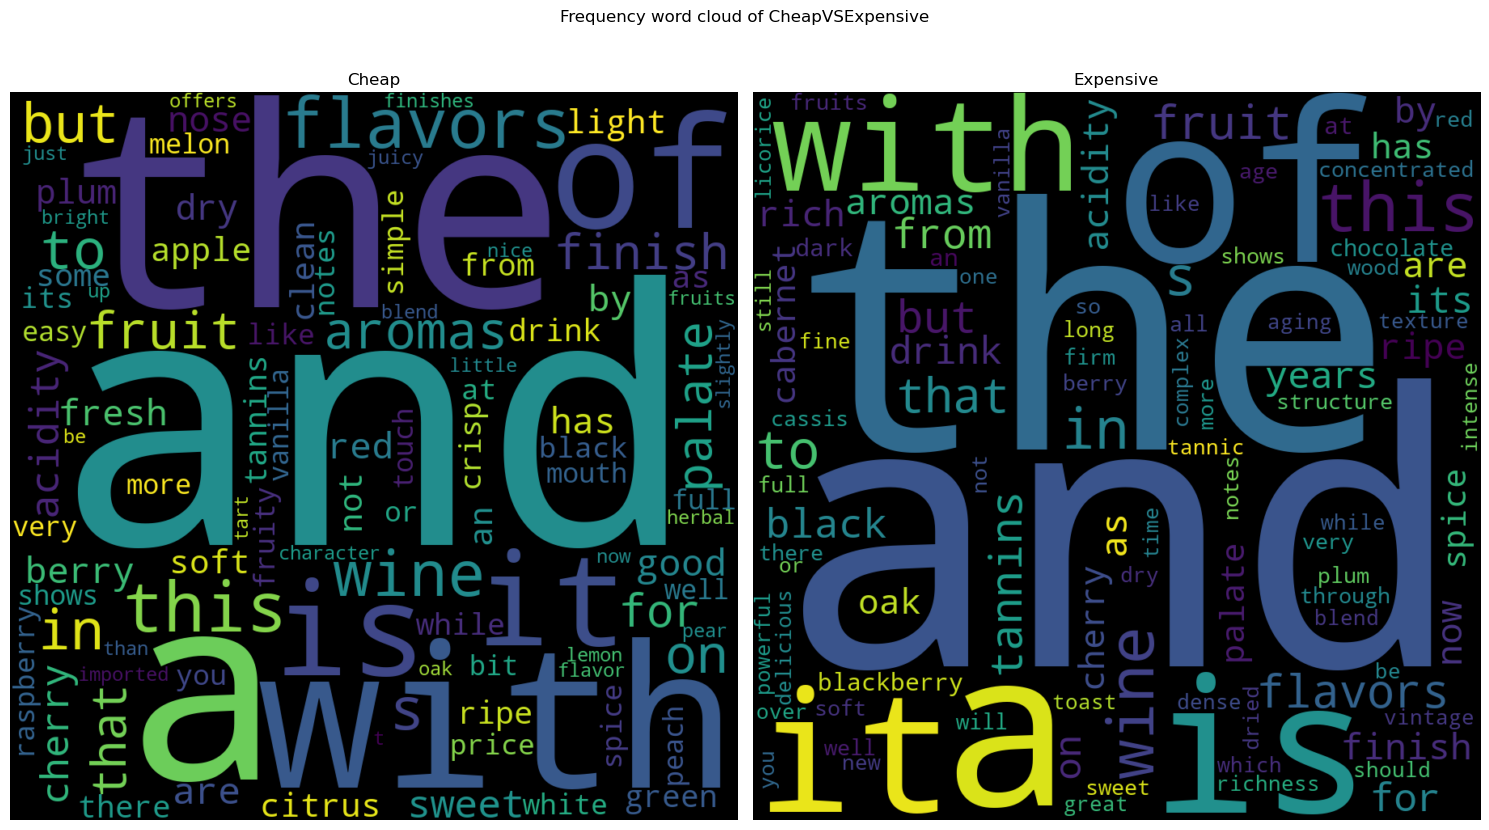

In [37]:
cloud((freqs['cheap'], freqs['expensive']), ('Cheap', 'Expensive'), "Frequency word cloud of CheapVSExpensive")

In [38]:
freqs['cheap_pmi'] = np.log2((freqs['cheap'] * freqs['total'].sum())/(freqs['cheap'].sum()*freqs['total']))
freqs['expensive_pmi'] = np.log2((freqs['expensive'] * freqs['total'].sum())/(freqs['expensive'].sum()*freqs['total']))

/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


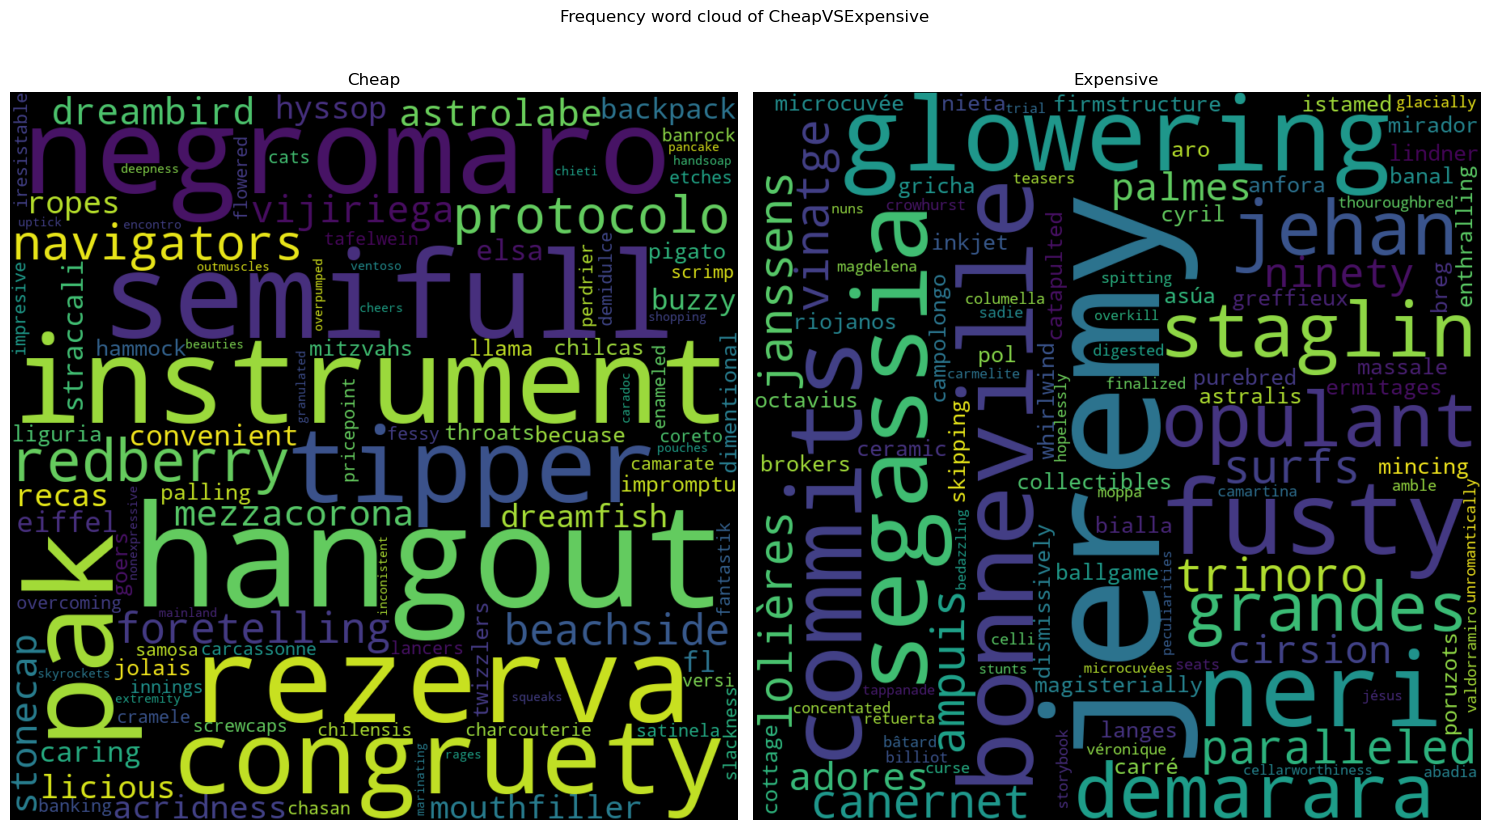

In [39]:
cloud((freqs['cheap_pmi'], freqs['expensive_pmi']), ('Cheap', 'Expensive'), "Frequency word cloud of CheapVSExpensive")

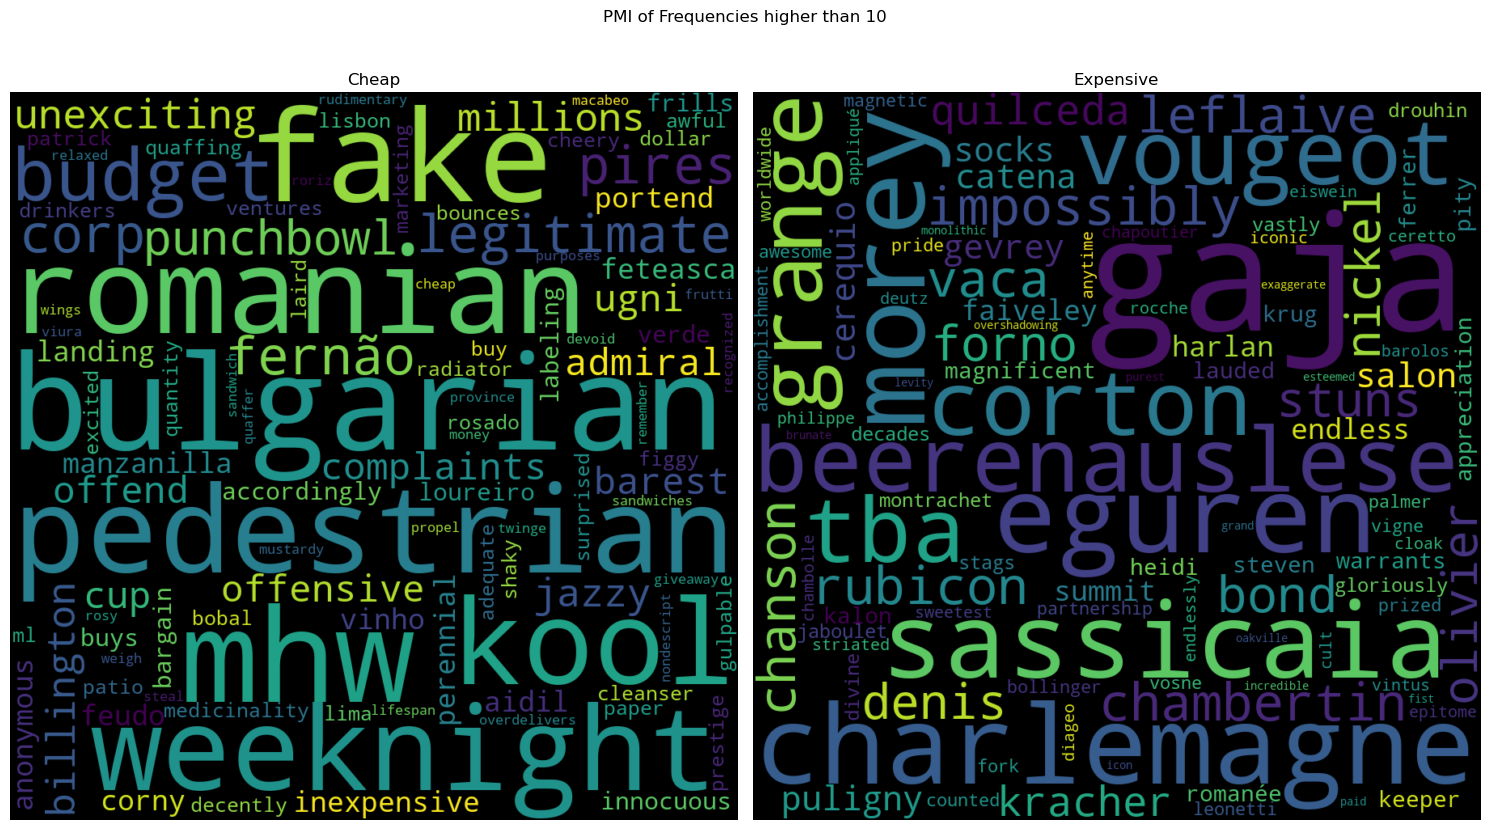

In [40]:
cloud((freqs.query('total>10')['cheap_pmi'], freqs.query('total>10')['expensive_pmi']), ('Cheap', 'Expensive'), "PMI of Frequencies higher than 10")

In [41]:
df.query('description.str.contains("gaja")').head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,len,tokens


In [42]:
df.query('description.str.contains("Gaja")').head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,len,tokens
21436,Italy,"From the Tuscan estate of Angelo Gaja, Promis delivers all the gorgeous intensity and complexity you should expect. The wine oozes dark chocolate, cherry liqueur, spice, blackberry and moist tobacco. The mouthfeel is soft and smooth; absolutely delicious.",Promis,95,50.0,Tuscany,Toscana,NaN,Red Blend,Ca' Marcanda,255,"[from, the, tuscan, estate, of, angelo, gaja, promis, delivers, all, the, gorgeous, intensity, and, complexity, you, should, expect, the, wine, oozes, dark, chocolate, cherry, liqueur, spice, blackberry, and, moist, tobacco, the, mouthfeel, is, soft, and, smooth, absolutely, delicious, ]"
39727,Italy,Magari is a uniquely nostalgic Italian word that loosely translates as ‘if only.' If only Angelo Gaja released a Magari of this caliber every vintage. The wine is smooth and rich with lingering tones of cherry and sweet spice.,Magari,92,85.0,Tuscany,Toscana,NaN,Sangiovese,Ca' Marcanda,226,"[magari, is, a, uniquely, nostalgic, italian, word, that, loosely, translates, as, if, only, if, only, angelo, gaja, released, a, magari, of, this, caliber, every, vintage, the, wine, is, smooth, and, rich, with, lingering, tones, of, cherry, and, sweet, spice, ]"
65467,Italy,This drop-dead gorgeous Brunello (from Angelo Gaja's estate in Montalcino) boasts the beauty and charm of a vineyard that is blossoming with quality and intensity of fruit. You'll get traditional notes of black licorice and cherry liqueur backed by elegant notes of spice and earth.,Rennina,95,155.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese Grosso,Pieve Santa Restituta,282,"[this, drop, dead, gorgeous, brunello, from, angelo, gaja, s, estate, in, montalcino, boasts, the, beauty, and, charm, of, a, vineyard, that, is, blossoming, with, quality, and, intensity, of, fruit, you, ll, get, traditional, notes, of, black, licorice, and, cherry, liqueur, backed, by, elegant, notes, of, spice, and, earth, ]"
65631,Italy,"From Angelo Gaja's beautiful estate in coastal Tuscany, this super Tuscan expression delivers opulent aromas of powdered chocolate, black fruit, exotic spice, clove, leather and tobacco. The wine is beautifully integrated and harmonious and ends with impressive staying power and persistency.",Camarcanda,93,164.0,Tuscany,Bolgheri,NaN,Red Blend,Ca' Marcanda,292,"[from, angelo, gaja, s, beautiful, estate, in, coastal, tuscany, this, super, tuscan, expression, delivers, opulent, aromas, of, powdered, chocolate, black, fruit, exotic, spice, clove, leather, and, tobacco, the, wine, is, beautifully, integrated, and, harmonious, and, ends, with, impressive, staying, power, and, persistency, ]"
81686,Italy,"This is an elegant Nebbiolo-based wine and arguably the most feminine of Gaja's newest releases. There's extreme balance and sophistication evident in the focused aromas of wild berry, white licorice, pressed violets and polished stone. The mouthfeel is tight, firm and those tannins need at least 10 more years to soften in your cellar. Beautiful.",Sorì Tildìn,99,440.0,Piedmont,Langhe,NaN,Nebbiolo,Gaja,348,"[this, is, an, elegant, nebbiolo, based, wine, and, arguably, the, most, feminine, of, gaja, s, newest, releases, there, s, extreme, balance, and, sophistication, evident, in, the, focused, aromas, of, wild, berry, white, licorice, pressed, violets, and, polished, stone, the, mouthfeel, is, tight, firm, and, those, tannins, need, at, least, more, years, to, soften, in, your, cellar, beautiful, ]"


In [45]:
df.query('description.str.contains("forno")').head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,len,tokens
18495,Italy,"Ripe and intense aromas of cherry, ripe raspberry and almond are backed by lingering tones of clove, cinnamon and allspice. The wine is rich and long lasting and would make a great pairing pasta to pasta al forno.",NaN,86,NaN,Sicily & Sardinia,Sicilia,NaN,Merlot,Feudo Principi di Butera,213,"[ripe, and, intense, aromas, of, cherry, ripe, raspberry, and, almond, are, backed, by, lingering, tones, of, clove, cinnamon, and, allspice, the, wine, is, rich, and, long, lasting, and, would, make, a, great, pairing, pasta, to, pasta, al, forno, ]"
42140,Italy,"From the warmer 2005 vintage, this Riserva Chianti Classico is packed tight with mature aromas of black cherry, cassis, leather, black tobacco and a touch of drying graphite. The wine would pair with cheesy lasagna al forno.",Riserva,90,25.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano,224,"[from, the, warmer, vintage, this, riserva, chianti, classico, is, packed, tight, with, mature, aromas, of, black, cherry, cassis, leather, black, tobacco, and, a, touch, of, drying, graphite, the, wine, would, pair, with, cheesy, lasagna, al, forno, ]"
46579,Italy,"Pretty coffee notes are offset by ripe aromas of raspberry, black cherry and chocolate: There is nice softness and density in this wine that is balanced against the natural acidity of the fruit. Pair this wine with cheesy pasta al forno.",La Tota,89,28.0,Piedmont,Barbera d'Asti,NaN,Barbera,Marchesi Alfieri,237,"[pretty, coffee, notes, are, offset, by, ripe, aromas, of, raspberry, black, cherry, and, chocolate, there, is, nice, softness, and, density, in, this, wine, that, is, balanced, against, the, natural, acidity, of, the, fruit, pair, this, wine, with, cheesy, pasta, al, forno, ]"
